# Homework 12 - Nonlinear optimization Daniel Teeuwsen

#### Exercise 1
Consider the differential equations
$$\frac{dx}{dt} = -x+ay+x^2y,\ \frac{dy}{dt}=b-ay-x^2y$$
In mathematics,  a [stationary point][1] of a differentiable function of one variable is a point on the graph of the function where the function's derivative is zero.

Solve for the stationary points of the equations by the relaxation method when $a=1$ and $b=2$;
$$-x+ay+x^2y = 0\ \textrm{  (1) }, \ \ b-ay-x^2y=0\ \textrm{  (2) }$$

So you can check your results, the analytical solution is clearly
$$x=b, \ \ y=\frac{b}{a+b^2}$$

You have two choices of how to solve for $x$ and $y$, depending on which two of the equations you solve for $x$ and the other $y$, or vice vera. Provide both ways as different functions in your program.

[1]: https://en.wikipedia.org/wiki/Stationary_point

In [2]:
%matplotlib inline
import numpy             as np
import scipy.misc
import scipy.optimize
import matplotlib.pyplot as plt

In [38]:
def f1(x,y, *args):            # solve eq1 for y and eq2 for x
    a,b = args
    xi = ((b-a*y)/y)**(1/2)
    yi = x/(a+x*x)
    return xi, yi

def f2(x,y, *args):           # solve eq1 for x and eq2 for y
    a,b = args                # because of where the root is only this root of quadratic eqn needed
    xi = (1+(1-4*a*y*y)**(1/2))/(2*y)
    yi = b/(a+x*x)
    return xi, yi

def f3(x,y, *args):           # solve eq1 for x and eq2 for y (x implicitly as function of x and y)
    a,b = args                # SIMILAR TO f2
    xi = a*y+x*x*y
    yi = b/(a+x*x)
    return xi, yi

def relaxation_loop(f,x0,y0,N):
    x = x0 
    y = y0
    for i in range(N):
        xi, yi = f(x,y,a,b)
        if (np.isclose(x,xi,atol=1.E-6,rtol=0.)) and (np.isclose(y,yi,atol=1.E-6,rtol=0.)):
            print('x_'+str(i)+'='+str(x)+'   y_'+str(i)+'='+str(y))
            break
        else: 
            print('x_'+str(i)+'='+str(x)+'   y_'+str(i)+'='+str(y))
            x = xi
            y = yi

x0 = 0.2      # starting values
y0 = 0.3
N  = 50       # max iterations
a  = 1        # constants
b  = 2

print(relaxation_loop(f1,x0,y0,N))
#print(relaxation_loop(f2,x0,y0,N))                
#print(relaxation_loop(f3,x0,y0,N))

x_0=0.2   y_0=0.3
x_1=2.3804761428476167   y_1=0.19230769230769232
x_2=3.0659419433511785   y_2=0.3570714214271425
x_3=2.1450222227548226   y_3=0.2948021099376133
x_4=2.4050388686580098   y_4=0.3829630670359366
x_5=2.054856617405658   y_5=0.3545052664811758
x_6=2.1544523965803   y_6=0.3934670962603804
x_7=2.020647706662894   y_7=0.38188236048535357
x_8=2.0584496424312717   y_8=0.3975291928529229
x_9=2.007754231186972   y_9=0.393042804195943
x_10=2.022005020257384   y_10=0.3990704594853988
x_11=2.0029094639423852   y_11=0.3973672616301183
x_12=2.008264740565524   y_12=0.3996510000415707
x_13=2.0010912795483837   y_13=0.3990093302934211
x_14=2.003101125020025   y_14=0.39986906552298906
x_15=2.0004092623468273   y_15=0.3996280192021194
x_16=2.0011631837638766   y_16=0.39995089119907884
x_17=2.000153477957527   y_17=0.39986043961388246
x_18=2.000436230850242   y_18=0.39998158302202497
x_19=2.0000575548780364   y_19=0.39994765534365795
x_20=2.0001635917692653   y_20=0.39999309346763884
x_21

<font color="blue">ANSWER:</font> (2,0.4) is the fixed point. When solving eqn 1 for x and 2 for y the relaxation method does not converge to the solution.

#### Excercise 2
Consider this image of two weights hanging from a rigid bar.
<img src="./bitmap.png" width=400 />
This is a static picture, nothing is moving. **Can you find the three tensions in the string, $T_1$, $T_2$, and $T_3$?** </font> Looking  at the image on the right, we see we will need to find the angles that all the strings make with respect to the horizontal (the bar is assumed to be horizontal). If we assume that the strings start and end at the same height, the constraints due to geometry alone are the following:
$$\begin{eqnarray}
L_1\cos\theta_1+L_2\cos\theta_2+L_3\cos\theta_3 &=& L \\
L_1\sin\theta_1+L_2\sin\theta_2-L_3\sin\theta_3 &=& 0 \\
\sin^2\theta_1+\cos^2\theta_1 &=& 1 \\
\sin^2\theta_2+\cos^2\theta_2 &=& 1 \\
\sin^2\theta_3+\cos^2\theta_3 &=& 1
\end{eqnarray}$$
The last three are trigonometric identities and normally would not need to be there. However, I want to treat $\cos\theta$ and $\sin\theta$ as independant variables to find, so I need more independant equations.
Sum of the forces on each weight should add to zero, and gives these equations;
$$\begin{eqnarray}
T_1\sin\theta_1-T_2\sin\theta_2-W_1 &=& 0 \\
T_1\cos\theta_1-T_2\cos\theta_2 &=& 0 \\
T_2\sin\theta_2+T_3\sin\theta_3-W_2 &=& 0 \\
T_2\cos\theta_2-T_3\cos\theta_3 &=& 0 
\end{eqnarray}$$
Now put the unknowns as a vector:
$$\vec{x} = \left(
\begin{array}{c}
x_0 \\ x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \\ x_6 \\ x_7 \\ x_8
\end{array}
\right)=
\left(
\begin{array}{c}
\sin\theta_1 \\ \sin\theta_2 \\ \sin\theta_3 \\ \cos\theta_1 \\ \cos\theta_2 \\ \cos\theta_3 \\ T_1 \\ T_2 \\ T_3
\end{array}
\right)$$
Now the nine equations above can be written as vector of nine functions. Just substitute the definition of $x_i$ into the equations, and move any non-zero right side to the left side.
$$f_i(x_0,\dots,x_8) = 0, \ \ i=0,8$$
$$f(\vec{x}) = \left(
\begin{array}{c}
f_0(\vec{x}) \\ f_1(\vec{x}) \\ f_2(\vec{x}) \\ f_3(\vec{x}) \\ f_4(\vec{x}) \\ f_5(\vec{x}) \\ f_6(\vec{x}) \\ f_7(\vec{x}) \\ f_8(\vec{x})\end{array}
\right)=\vec{0}$$


1. In a new markdown cell, write out the 9 new functions in term of the $x_i$. (Use this cell as a guide to how to enter LateX code for arrays of equations.)
2. Compute the Jacobian matrix, but don't write it here. Do include it in your program. Most of the elements are zero. Only 28 are not zero.           
3. Use the following values and compute the vector $\vec{x}$ using `scipy.optimize.root`. Use both a Jacobian solver such as `lm` and a non-Jacobian solver such as `krylov`.
```python
constants = (10.0,    # W1
             20.0,    # W2
             3.0,    # L1
             4.0,    # L2
             4.0,    # L3 
             8.0)    # L
```

4. From the results of the `scipy.optimize.root` function: 
    - Print out the number of times the function and Jacobian were used by the solver. This may be either in the variables `res.nfev` \& `res.njev` or in the variable `res.nit`, depending on the solver method.
    - Print out any message returned from the solver.

Here's a helper to get you started:
```python
def f(x,*args) :    
    W1, W2, L1, L2, L3, L = args
    x0,x1,x2,x3,x4,x5,x6,x7,x8 = x

    f0 = L1*x3 + L2*x4 + L3*x5 - L
    ...more goes here...
    return numpy.array([f0,f1,f2,f3,f4,f5,f6,f7,f8])
          
def J(x,*args) :
    W1, W2, L1, L2, L3, L = args
    x0,x1,x2,x3,x4,x5,x6,x7,x8 = x
    
    J = numpy.zeros((9,9),dtype=float)
    J[0,3] = L1
    ...more goes here...
    return J
```


<font color="blue">Answer</font>
$$\begin{eqnarray}
L_1x_3+L_2x_4+L_3x_5-L &=& 0 \\
L_1x_0+L_2x_1-L_3x_2 &=& 0 \\
{x_0}^2+{x_3}^2-1 &=& 0 \\
{x_1}^2+{x_4}^2-1 &=& 0 \\
{x_2}^2+{x_5}^2-1 &=& 0 \\
x_6x_0-x_7x_1-W_1 &=& 0 \\
x_6x_3-x_7x_4 &=& 0 \\
x_7x_1+x_8x_2-W_2 &=& 0 \\
x_7x_4-x_8x_5 &=& 0 
\end{eqnarray}$$

In [58]:
def f(x,*args) :    
    W1, W2, L1, L2, L3, L = args
    x0,x1,x2,x3,x4,x5,x6,x7,x8 = x

    f0 = L1*x3 + L2*x4 + L3*x5 - L
    f1 = L1*x0 + L2*x1 - L3*x2
    f2 = x0*x0+x3*x3-1
    f3 = x1*x1+x4*x4-1
    f4 = x2*x2+x5*x5-1
    f5 = x6*x0-x7*x1-W1
    f6 = x6*x3-x7*x4
    f7 = x7*x1+x8*x2-W2
    f8 =x7*x4-x8*x5
    
    return np.array([f0,f1,f2,f3,f4,f5,f6,f7,f8])
          
def J(x,*args) :
    W1, W2, L1, L2, L3, L = args
    x0,x1,x2,x3,x4,x5,x6,x7,x8 = x
    
    J = np.zeros((9,9),dtype=float)
    J[0,3] = L1
    J[0,4] = L2
    J[0,5] = L3
    J[1,0] = L1
    J[1,1] = L2
    J[1,2] = L3
    J[2,0] = 2*x0
    J[2,3] = 2*x3
    J[3,1] = 2*x1
    J[3,4] = 2*x4
    J[4,2] = 2*x2
    J[4,5] = 2*x5
    J[5,0] = x6
    J[5,1] = -x7
    J[5,6] = x0
    J[5,7] = -x1
    J[6,3] = x6
    J[6,4] = -x7
    J[6,6] = x3
    J[6,7] = -x4
    J[7,1] = x7
    J[7,2] = x8
    J[7,7] = x1
    J[7,8] = x2
    J[8,4] = x7
    J[8,5] = -x8
    J[8,7] = x4
    J[8,8] = -x5
    
    return J

constants =  (10.0,   # W1
              20.0,   # W2
              3.0,    # L1
              4.0,    # L2
              4.0,    # L3 
              8.0)    # L
initial = [1,1,1,1,1,1,1,1,1]

sol1 = scipy.optimize.root(f, initial, jac=J, args=constants, method='lm')
#print(sol1)   #returns everything (sort of messy)

sol2 = scipy.optimize.root(f, initial, args=constants, method='krylov')
#print(sol2)    #returns everything (sort of messy)

#print(f(sol1.x,*constants))          # Verifies the solutions, both should print 0 vectors
#print(f(sol2.x,*constants))

print(sol1.x)                         # solution: desired x vectors, should be nearly identical
print(sol2.x)
print('\n')

print('Message from method 1 solver: '+sol1.message)
print('Message from method 2 solver: '+sol2.message)
print('\n')

print('Number of times function was evaluated (method 1): '+str(sol1.nfev))
print('Number of times Jacobian was evaluated (method 1): '+str(sol1.njev))
print('\n') 

print('Number of times function was evaluated (method 2): '+str(sol2.nit))

[ 0.76100269  0.26495381  0.83570583  0.64874872  0.96426111  0.54917735
 17.16020972 11.54527965 20.27152809]
[ 0.76100269  0.26495381  0.83570583  0.64874872  0.9642611   0.54917735
 17.16020978 11.54527968 20.27152804]


Message from method 1 solver: The relative error between two consecutive iterates is at most 0.000000
Message from method 2 solver: A solution was found at the specified tolerance.


Number of times function was evaluated (method 1): 55
Number of times Jacobian was evaluated (method 1): 51


Number of times function was evaluated (method 2): 68


#### Excercise 3

The [Buckingham potential][1] is an approximate representation of the potential energy of ineteraction between atoms in a solid, liquid, or gas as a function of the distance between them;
$$V(r) = V_0\left[\left(\frac{\sigma}{r}\right)^6-e^{-r/\sigma}\right]$$
 
Make a plot of this function for $V_0=1$ and $\sigma=1$, using $x$ range $0.01\rightarrow8$,and $y$ scale $-0.2\rightarrow+0.2$. Numerically find the minimum position using the Jacobian and `scipy.optimize.minimize` with the method `Newton-CG`.

[1]: https://en.wikipedia.org/wiki/Buckingham_potential

[1.63051593]
[-0.1426116]


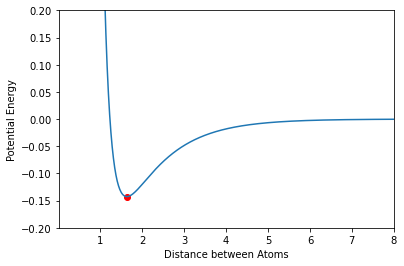

In [92]:
v0 = 1
sigma = 1

myConstants = (v0, sigma)

def buckingham(r, *args):
    v0,sigma = args
    return v0*((sigma/r)**6-np.exp(-r/sigma))

def Jac(r, *args):
    v0,sigma = args
    return -6*sigma*r**(-7)+sigma**(-1)*np.exp(-r/sigma)

plt.xlim([0.01,8])
plt.ylim([-0.2,0.2])

plt.xlabel('Distance between Atoms')
plt.ylabel('Potential Energy')
plt.plot(1.63,-0.143,'ro') 
plt.plot(np.linspace(0.01,8.,800),buckingham(np.linspace(0.01,8.,800),*myConstants))

sol = scipy.optimize.minimize(buckingham,1,args=myConstants,method='Newton-CG',jac=Jac)
print(sol.x)
print(buckingham(sol.x,*myConstants))

#### Excercise 4

Find the global minimum of the [Rosenbrock function][1]. Use the starting values shown in the wikipedia page. Solve it twice, once with and once without the Jacobian.

[1]: https://en.wikipedia.org/wiki/Rosenbrock_function

In [135]:
def rosenbrock(x,*args):
    a,b = args
    return (a-x[0])**2+b*(x[1]-x[0]**2)**2

def rosenJac(x,*args):
    a,b = args
    return np.array([-2*a+2*x[0]-4*b*(x[1]-x[0]**2)*x[0] , 2*b*(x[1]-x[0]**2)])

a = 1
b = 100                        #initial parameters
argsToPass = (a,b)
initial = np.array([1,2])

#With Jacobian
sol = scipy.optimize.minimize(rosenbrock,initial,args=argsToPass,method="BFGS",jac=rosenJac)
print('global minimum at (x,y)= '+str(sol.x))
print('value of function at minimum = '+str(rosenbrock(sol.x,*argsToPass)))
print('\n')

#Without Jacobian
sol = scipy.optimize.minimize(rosenbrock,initial,args=argsToPass,method="BFGS")
print('global minimum at (x,y)= '+str(sol.x))
print('value of function at minimum = '+str(rosenbrock(sol.x,*argsToPass)))

global minimum at (x,y)= [0.99999994 0.99999988]
value of function at minimum = 5.303250374773723e-15


global minimum at (x,y)= [0.99999649 0.99999304]
value of function at minimum = 1.2747599056926497e-11
